# D208 Predictive Modeling Task 2: Logistic Regression

## Jan Francis Mitchell Barlaan 

### A1: RESEARCH QUESTION
* The research question I aim to answer in this task is which customer socioeconomic factors influence churn? I believe this is important in custom-tailoring services and plans on an individual customer basis, which can help promote customer satisfaction and continued service subscription.

### A2: GOALS 
* The goal for this analysis is to discover patterns and specific variables that are more likely to contribute to customer churn. 

### B1: SUMMARY OF ASSUMPTIONS
The following are assumptions that logistic regression makes (Bobbitt, 2020):
* The response/dependent variable is binary - it can only take on two possible outcomes 
* Observations in the dataset are independent from each other
* Multicolinearity does not exist among the explanatory/independent variables
* The dataset does not contain extreme outliers 
* The independent variables are linearly related to the log odds of the dependent variable
* There is a sufficiently large sample size

### B2: TOOL BENEFITS
I chose to use Python 3 kernel within Jupyter Notebook IDE to perform this task due to its ease of use and integration with visualization and statistical modeling. Using Python as the main programming language also enabled me to use several libraries:
* Pandas was used to easily handle large datasets
* Numpy was used in mathematical calculations and operations
* Matplotlib and Seaborn was used for visualizations
* Scipy assisted in MLR modeling (VIF for multicollinearity check) and residual graphing
* Scikit-learn was used to perform the logistic regression and train test 
* Statsmodels was utilized to provide regression analysis summaries

### B3:APPROPRIATE TECHNIQUE
* Logistic regression is an appropriate analysis to use in this case since we are analyzing if relationships exist between each of our multiple predictor variables that are independent of one another to our dependent variable, 'Churn', which is a categorical variable with a binary outcome. 
* The remaining variables in this PA task are the 13 independent variables which I have chosen to analyze: 'Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year'.

### C1:DATA CLEANING GOALS
* My data cleaning goals involve detecting duplicates, nulls, and outliers and addressing them if present. Outliers will be detected for with boxplots and Z-score calculations. Also, in a later step I will create a new dataframe with only the columns that include my chosen dependent and independent variables for analysis. The following code is what I used to accomplish these data cleaning goals.

In [1]:
#Importing the necessary libraries

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn import preprocessing

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load CSV

# The first column is an index. We will duplicate this and create a column without it
df = pd.read_csv(r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D208\D208 PA Submission Task 2\Churn Clean/churn_clean.csv', index_col=0)

In [3]:
#Preview loaded data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income             

In [4]:
#Check for duplicates

df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [5]:
#Show number of duplicates. False = no duplicates 

print(df.duplicated().value_counts())

False    10000
dtype: int64


In [6]:
#Count of null/missing values in each column

df.isnull().sum()

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

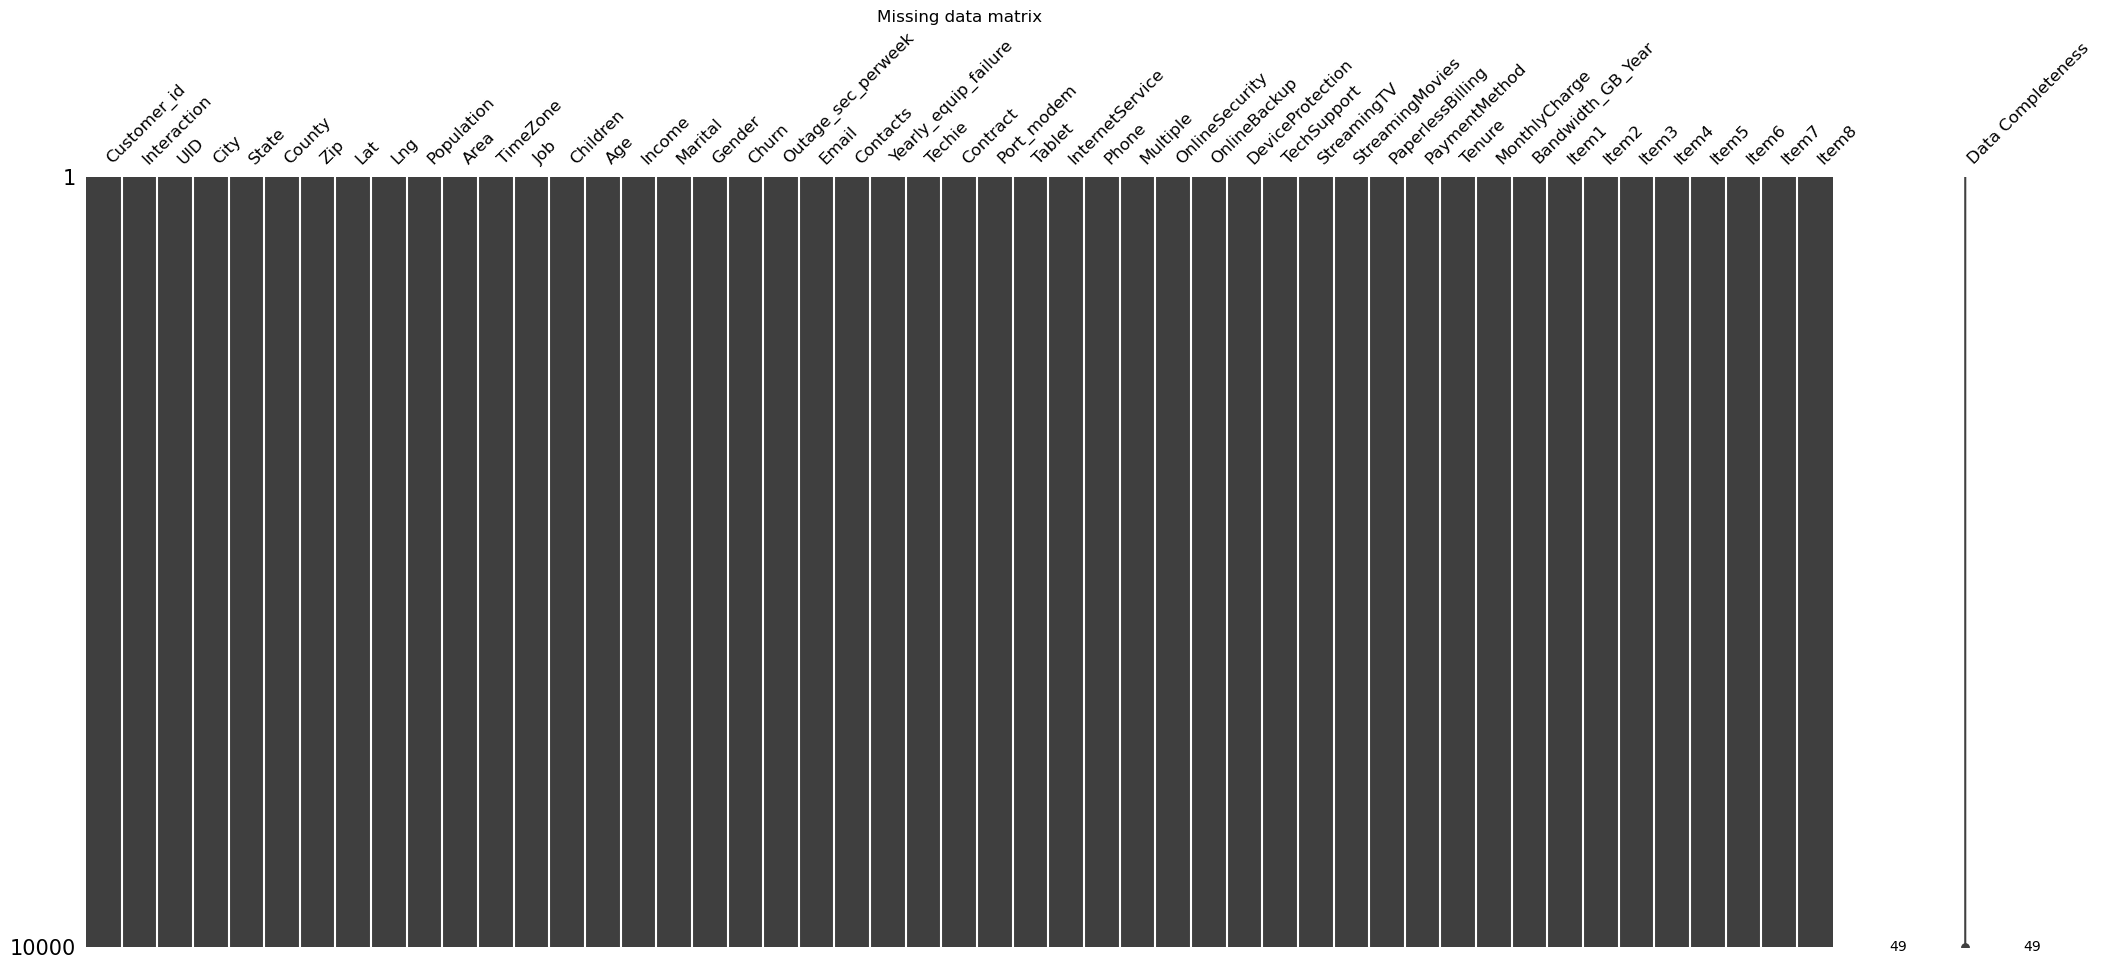

In [7]:
#Import missingno to visualize missing/null values 

import missingno as msno
msno.matrix(df, fontsize=12, labels=True)
plt.title('Missing data matrix')
plt.show()


In [8]:
#The following variables will be used in this task: Churn, Techie, TechSupport, StreamingTV, StreamingMovies, Phone, Multiple, Tablet, DeviceProtection, OnlineSecurity, OnlineBackup, PaperlessBilling, MonthlyCharge, Bandwidth_GB_Year

#Churn will be our dependent variable and the other 13 will be our independent variables



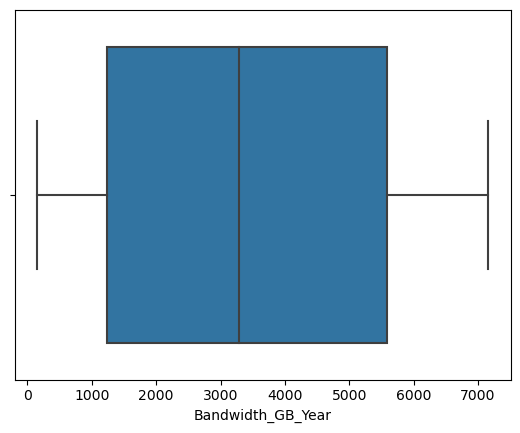

In [9]:
#Outlier check with boxplot on numerical continuous independent variable 'Bandwidth_GB_Year'

boxplot=sns.boxplot(x='Bandwidth_GB_Year',data=df)

In [10]:
#Calculate Z-score for 'Bandwidth_GB_Year'

df['Z_Score_Bandwidth_GB_Year']=stats.zscore(df['Bandwidth_GB_Year'])
df[['Bandwidth_GB_Year','Z_Score_Bandwidth_GB_Year']].head(40)

,Bandwidth_GB_Year,Z_Score_Bandwidth_GB_Year
CaseOrder,,
1,904.536110,-1.138487
2,800.982766,-1.185876
3,2054.706961,-0.612138
4,2164.579412,-0.561857
5,271.493436,-1.428184
6,1039.357983,-1.076789
7,1907.242972,-0.679621
8,979.612708,-1.104130
9,1312.874964,-0.951620


In [11]:
#Print number of outliers based on z-score for 'Bandwidth_GB_Year'

df_outliers = df.query('(Z_Score_Bandwidth_GB_Year > 3) | (Z_Score_Bandwidth_GB_Year < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['Bandwidth_GB_Year'].to_dict().values())

Number of outliers: 0
Outlier values: dict_values([])


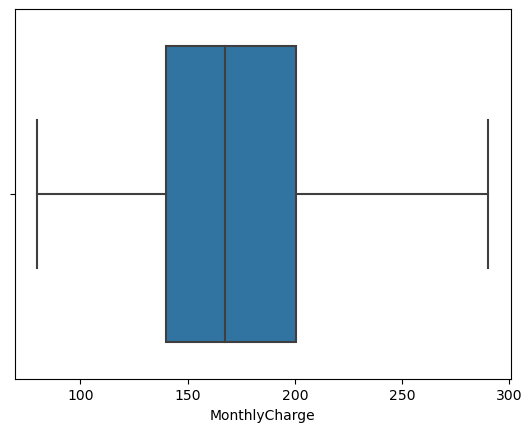

In [12]:
#Outlier check with boxplot on numerical continuous independent variable 'MonthlyCharge'

boxplot=sns.boxplot(x='MonthlyCharge',data=df)

In [13]:
#Calculate Z-score for 'MonthlyCharge'

df['Z_Score_MonthlyCharge']=stats.zscore(df['MonthlyCharge'])
df[['MonthlyCharge','Z_Score_MonthlyCharge']].head(40)

,MonthlyCharge,Z_Score_MonthlyCharge
CaseOrder,,
1,172.455519,-0.003943
2,242.632554,1.630326
3,159.947583,-0.295225
4,119.956840,-1.226521
5,149.948316,-0.528086
6,185.007692,0.288370
7,200.118516,0.640268
8,114.950905,-1.343098
9,117.468591,-1.284467


In [14]:
#Print number of outliers based on z-score for 'MonthlyCharge'

df_outliers = df.query('(Z_Score_MonthlyCharge > 3) | (Z_Score_MonthlyCharge < -3)')
print("Number of outliers:", df_outliers.shape[0])
print("Outlier values:", df_outliers['MonthlyCharge'].to_dict().values())


Number of outliers: 0
Outlier values: dict_values([])


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_id                10000 non-null  object 
 1   Interaction                10000 non-null  object 
 2   UID                        10000 non-null  object 
 3   City                       10000 non-null  object 
 4   State                      10000 non-null  object 
 5   County                     10000 non-null  object 
 6   Zip                        10000 non-null  int64  
 7   Lat                        10000 non-null  float64
 8   Lng                        10000 non-null  float64
 9   Population                 10000 non-null  int64  
 10  Area                       10000 non-null  object 
 11  TimeZone                   10000 non-null  object 
 12  Job                        10000 non-null  object 
 13  Children                   10000 non-null  int

### C2: SUMMARY STATISTICS
* The following code shows the summary statistics for my chosen dependent and independent variables. My chosen dependent variable 'Churn' is a binary categorical variable as well as 11 of the 13 independent variables I have chosen for this analysis. Therefore, summary statistics for those variables will be shown with the value_counts() function, which shows the 'Yes' and 'No' count breakdowns. The other two independent variables 'MonthlyCharge' and 'Bandwidth_GB_Year' are continuous numerical variables, therefore I will use the describe() function to show their summary statistics. This function shows percentiles, standard deviation, min, max, and mean.

In [16]:
#Categorical variables

In [17]:
df.Churn.value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [18]:
df.Techie.value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [19]:
df.TechSupport.value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [20]:
df.StreamingTV.value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [21]:
df.StreamingMovies.value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [22]:
df.Phone.value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [23]:
df.Multiple.value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [24]:
df.Tablet.value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [25]:
df.DeviceProtection.value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [26]:
df.OnlineSecurity.value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [27]:
df.OnlineBackup.value_counts()

No     5494
Yes    4506
Name: OnlineBackup, dtype: int64

In [28]:
df.PaperlessBilling  .value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [29]:
#Numerical variables

In [30]:
df.MonthlyCharge.describe() 

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [31]:
df.Bandwidth_GB_Year.describe() 

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

### C4: DATA TRANSFORMATION
* After data cleaning and summary statistics, the following code shows the transformation and preparation steps I have taken with this data set prior to the logistic regression. I established boolean indexing to my categorical variables and converted the yes/no format to 1/0. Finally, I saved only the 14 chosen variables into a new data frame called 'logistic_regression_df'. This new dataframe will also be the working dataframe from which I draw my univariate and bivariate visualizations.

In [32]:
#Establish boolean indexing
boolean_mapping = {'Yes' : 1, 'No' : 0}

#Then, convert 'Churn', 'Techie','TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity','OnlineBackup', and 'PaperlessBilling' columns to booleans from string
df['Churn'] = df['Churn'].map(boolean_mapping)
df['Techie'] = df['Techie'].map(boolean_mapping)
df['TechSupport'] = df['TechSupport'].map(boolean_mapping)
df['StreamingTV'] = df['StreamingTV'].map(boolean_mapping)
df['StreamingMovies'] = df['StreamingMovies'].map(boolean_mapping)
df['Phone'] = df['Phone'].map(boolean_mapping)
df['Multiple'] = df['Multiple'].map(boolean_mapping)
df['Tablet'] = df['Tablet'].map(boolean_mapping)
df['DeviceProtection'] = df['DeviceProtection'].map(boolean_mapping)
df['OnlineSecurity'] = df['OnlineSecurity'].map(boolean_mapping)
df['OnlineBackup'] = df['OnlineBackup'].map(boolean_mapping)
df['PaperlessBilling'] = df['PaperlessBilling'].map(boolean_mapping)


In [33]:
#Create new dataframe
logistic_regression_df = df[['Churn', 'Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'MonthlyCharge', 'Bandwidth_GB_Year']]

logistic_regression_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              10000 non-null  int64  
 1   Techie             10000 non-null  int64  
 2   TechSupport        10000 non-null  int64  
 3   StreamingTV        10000 non-null  int64  
 4   StreamingMovies    10000 non-null  int64  
 5   Phone              10000 non-null  int64  
 6   Multiple           10000 non-null  int64  
 7   Tablet             10000 non-null  int64  
 8   DeviceProtection   10000 non-null  int64  
 9   OnlineSecurity     10000 non-null  int64  
 10  OnlineBackup       10000 non-null  int64  
 11  PaperlessBilling   10000 non-null  int64  
 12  MonthlyCharge      10000 non-null  float64
 13  Bandwidth_GB_Year  10000 non-null  float64
dtypes: float64(2), int64(12)
memory usage: 1.1 MB


In [34]:
logistic_regression_df.head()

,Churn,Techie,TechSupport,StreamingTV,StreamingMovies,Phone,Multiple,Tablet,DeviceProtection,OnlineSecurity,OnlineBackup,PaperlessBilling,MonthlyCharge,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,,
1,0,0,0,0,1,1,0,1,0,1,1,1,172.455519,904.536110
2,1,1,0,1,1,1,1,1,0,1,0,1,242.632554,800.982766
3,0,1,0,0,1,1,1,0,0,0,0,1,159.947583,2054.706961
4,0,1,0,1,0,1,0,0,0,1,0,1,119.956840,2164.579412
5,1,0,1,1,0,0,0,0,0,0,0,0,149.948316,271.493436


### C3: VISUALIZATIONS
* The following code shows univariate and bivariate visualizations for my 14 chosen variables. First, I have chosen a univariate distribution visualization for my chosen dependent variable 'Churn'. Next, I have each individual independent categorical variable shown univariately with a pie chart, followed by a mosaic plot for my bivariate plotting of that specific independent variable against the dependent variable 'Churn'(GeeksforGeeks, How to make a mosaic plot in Matplotlib 2024). 'MonthlyCharge' and 'Bandwidth_GB_Year' were univariately displayed with histograms and bivariately displayed against 'Churn' with boxplots.

In [35]:
#Set Seaborn Color

color = sns.color_palette('Blues')[4]

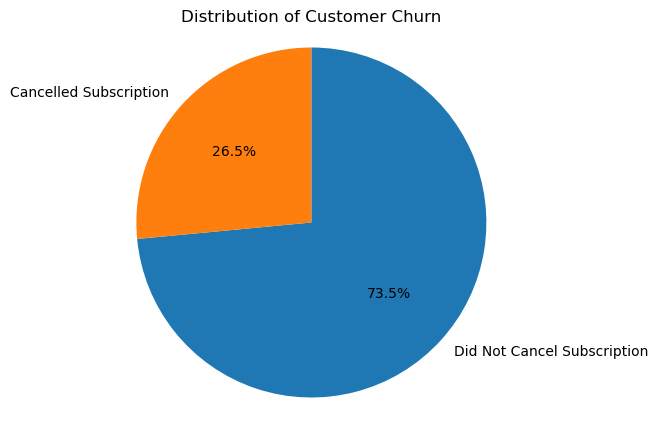

In [36]:
#Univariate exploration of dependent variable 'Churn'

plt.figure(figsize = [16,5])
plt.title('Distribution of Customer Churn')
churn_counts = logistic_regression_df.Churn.value_counts()
churn_labels = ['Did Not Cancel Subscription', 'Cancelled Subscription']
plt.pie(churn_counts, labels=churn_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

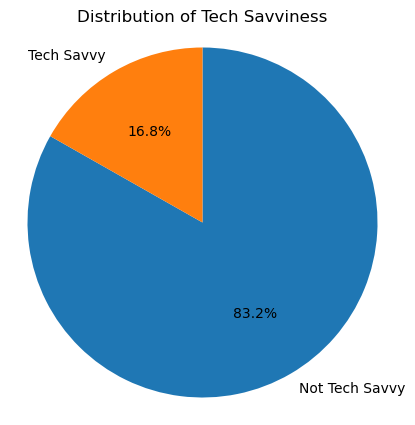

In [37]:
#TOP plot: Univariate exploration of independent variable 'Techie'

plt.figure(figsize = [16,5])
plt.title('Distribution of Tech Savviness')
techie_counts = logistic_regression_df.Techie.value_counts()
techie_labels = ['Not Tech Savvy', 'Tech Savvy']
plt.pie(techie_counts, labels=techie_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

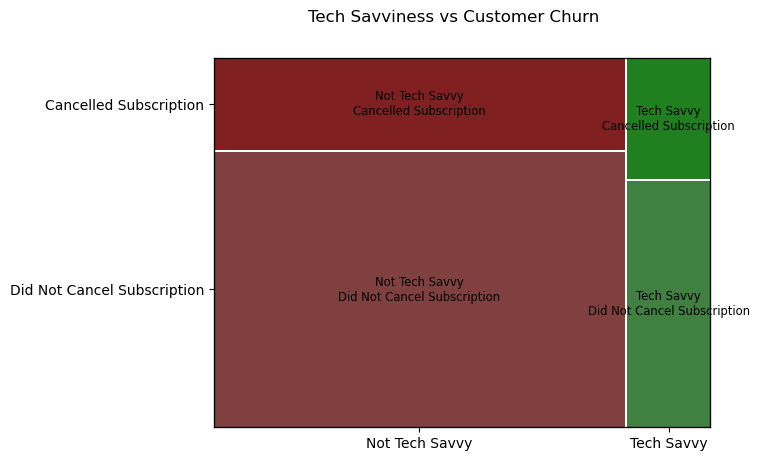

In [38]:
# BOTTOM plot: Bivariate exploration of Techie vs Churn

temp_df = logistic_regression_df[['Techie', 'Churn']].copy()
techie_map = {1: 'Tech Savvy', 0: 'Not Tech Savvy'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['Techie'] = temp_df['Techie'].map(techie_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['Techie', 'Churn'])
plt.suptitle('Tech Savviness vs Customer Churn');

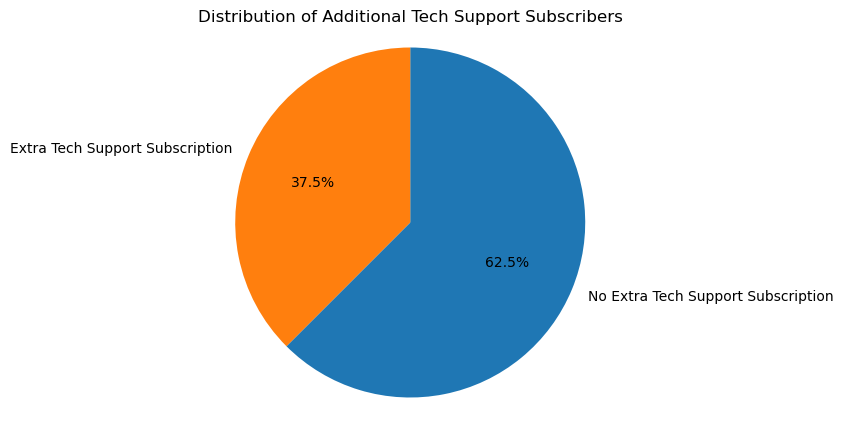

In [39]:
#TOP plot: Univariate exploration of independent variable 'TechSupport'

plt.figure(figsize = [16,5])
plt.title('Distribution of Additional Tech Support Subscribers')
techsupport_counts = logistic_regression_df.TechSupport.value_counts()
techsupport_labels = ['No Extra Tech Support Subscription', 'Extra Tech Support Subscription']
plt.pie(techsupport_counts, labels=techsupport_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

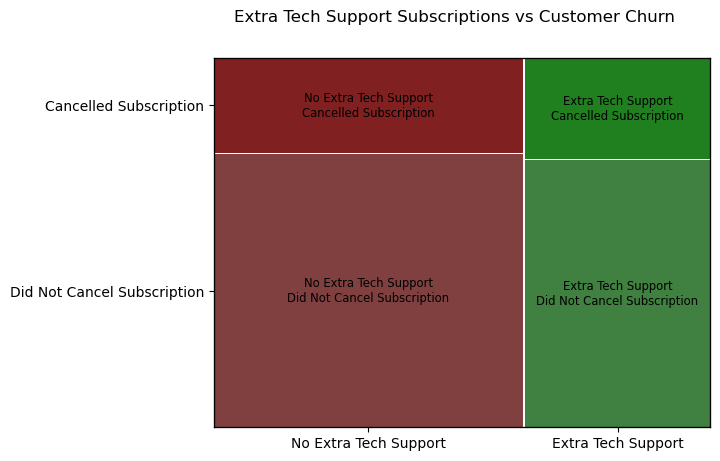

In [40]:
# BOTTOM plot: Bivariate exploration of TechSupport vs Churn

temp_df = logistic_regression_df[['TechSupport', 'Churn']].copy()
techsupport_map = {1: 'Extra Tech Support', 0: 'No Extra Tech Support'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['TechSupport'] = temp_df['TechSupport'].map(techsupport_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['TechSupport', 'Churn'])
plt.suptitle('Extra Tech Support Subscriptions vs Customer Churn');

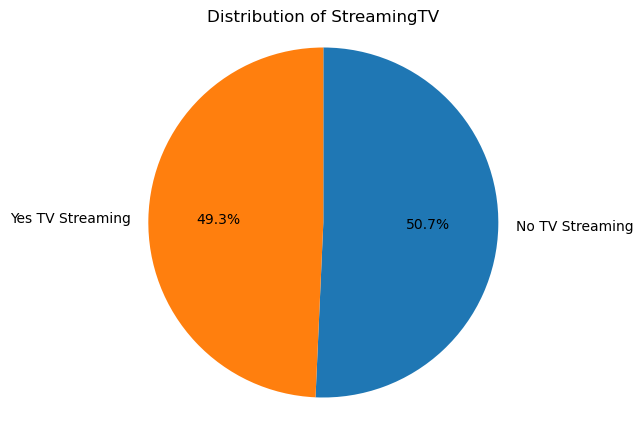

In [41]:
#TOP plot: Univariate exploration of independent variable 'StreamingTV'

plt.figure(figsize = [16,5])
plt.title('Distribution of StreamingTV')
streamingtv_counts = logistic_regression_df.StreamingTV.value_counts()
streamingtv_labels = ['No TV Streaming', 'Yes TV Streaming']
plt.pie(streamingtv_counts, labels=streamingtv_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

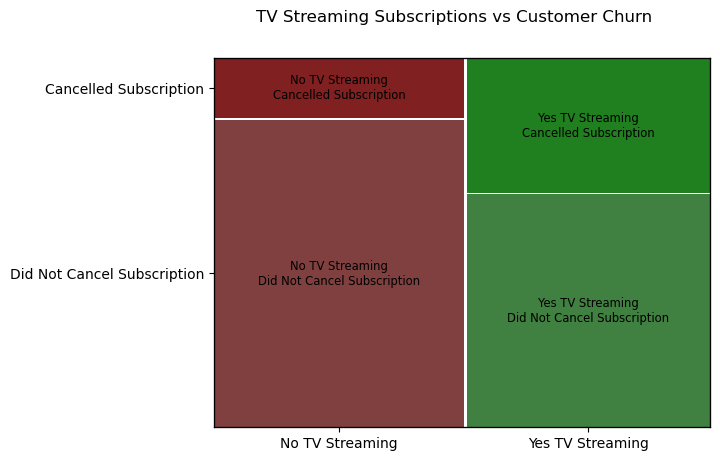

In [42]:
# BOTTOM plot: Bivariate exploration of StreamingTV vs Churn

temp_df = logistic_regression_df[['StreamingTV', 'Churn']].copy()
streamingtv_map = {1: 'Yes TV Streaming', 0: 'No TV Streaming'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['StreamingTV'] = temp_df['StreamingTV'].map(streamingtv_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['StreamingTV', 'Churn'])
plt.suptitle('TV Streaming Subscriptions vs Customer Churn');

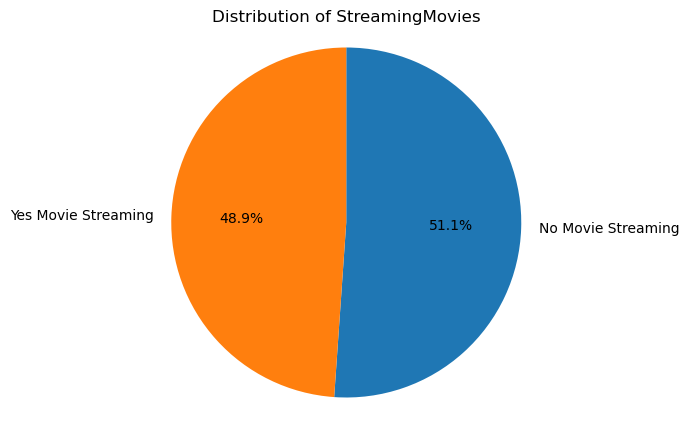

In [43]:
#TOP plot: Univariate exploration of independent variable 'StreamingMovies'

plt.figure(figsize = [16,5])
plt.title('Distribution of StreamingMovies')
streamingmovies_counts = logistic_regression_df.StreamingMovies.value_counts()
streamingmovies_labels = ['No Movie Streaming', 'Yes Movie Streaming']
plt.pie(streamingmovies_counts, labels=streamingmovies_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

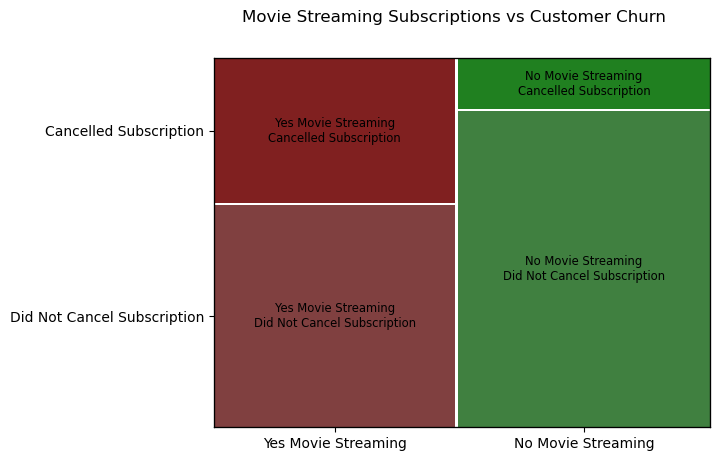

In [44]:
# BOTTOM plot: Bivariate exploration of StreamingMovies vs Churn

temp_df = logistic_regression_df[['StreamingMovies', 'Churn']].copy()
streamingmovies_map = {1: 'Yes Movie Streaming', 0: 'No Movie Streaming'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['StreamingMovies'] = temp_df['StreamingMovies'].map(streamingmovies_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['StreamingMovies', 'Churn'])
plt.suptitle('Movie Streaming Subscriptions vs Customer Churn');

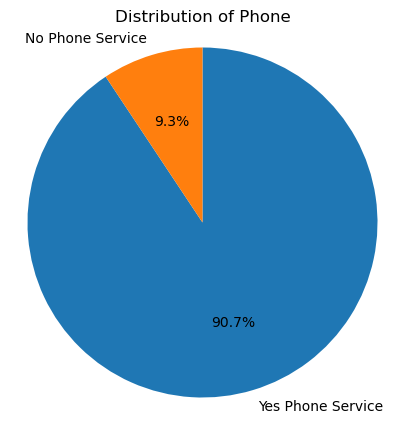

In [45]:
#TOP plot: Univariate exploration of independent variable 'Phone'

plt.figure(figsize = [16,5])
plt.title('Distribution of Phone')
phone_counts = logistic_regression_df.Phone.value_counts()
phone_labels = ['Yes Phone Service', 'No Phone Service']
plt.pie(phone_counts, labels=phone_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

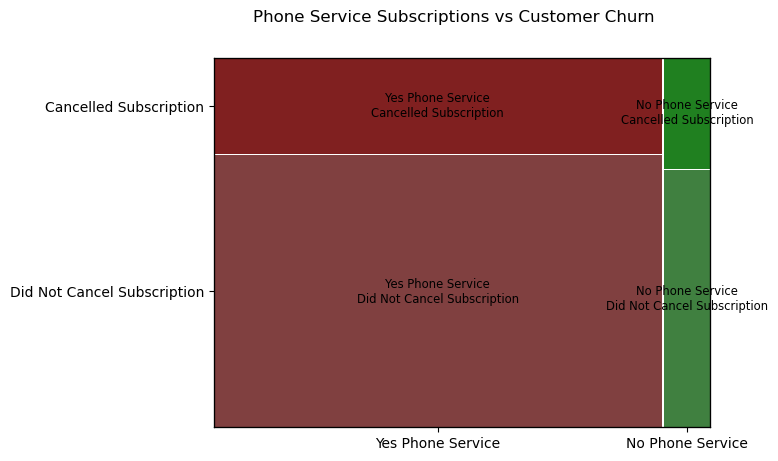

In [46]:
# BOTTOM plot: Bivariate exploration of Phone vs Churn

temp_df = logistic_regression_df[['Phone', 'Churn']].copy()
phone_map = {1: 'Yes Phone Service', 0: 'No Phone Service'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['Phone'] = temp_df['Phone'].map(phone_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['Phone', 'Churn'])
plt.suptitle('Phone Service Subscriptions vs Customer Churn');

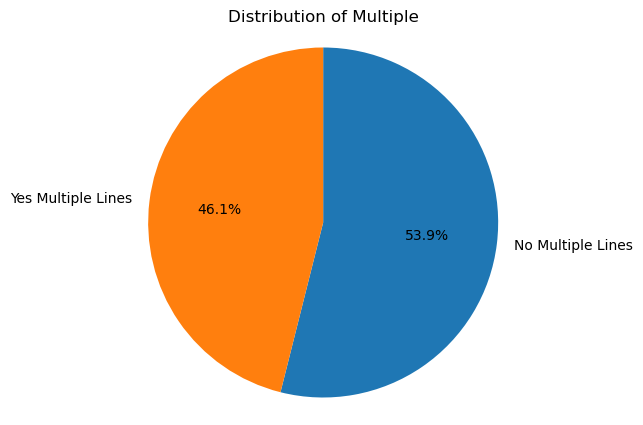

In [47]:
#TOP plot: Univariate exploration of independent variable 'Multiple'

plt.figure(figsize = [16,5])
plt.title('Distribution of Multiple')
multiple_counts = logistic_regression_df.Multiple.value_counts()
multiple_labels = ['No Multiple Lines', 'Yes Multiple Lines']
plt.pie(multiple_counts, labels=multiple_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

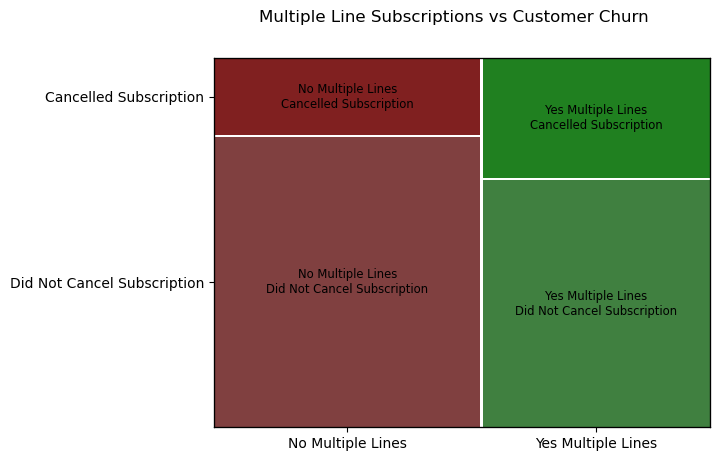

In [48]:
# BOTTOM plot: Bivariate exploration of Multiple vs Churn

temp_df = logistic_regression_df[['Multiple', 'Churn']].copy()
multiple_map = {1: 'Yes Multiple Lines', 0: 'No Multiple Lines'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['Multiple'] = temp_df['Multiple'].map(multiple_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['Multiple', 'Churn'])
plt.suptitle('Multiple Line Subscriptions vs Customer Churn');

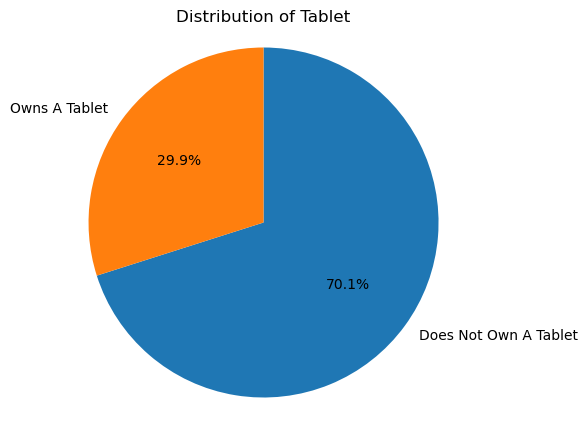

In [49]:
#TOP plot: Univariate exploration of independent variable 'Tablet'

plt.figure(figsize = [16,5])
plt.title('Distribution of Tablet')
tablet_counts = logistic_regression_df.Tablet.value_counts()
tablet_labels = ['Does Not Own A Tablet', 'Owns A Tablet']
plt.pie(tablet_counts, labels=tablet_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

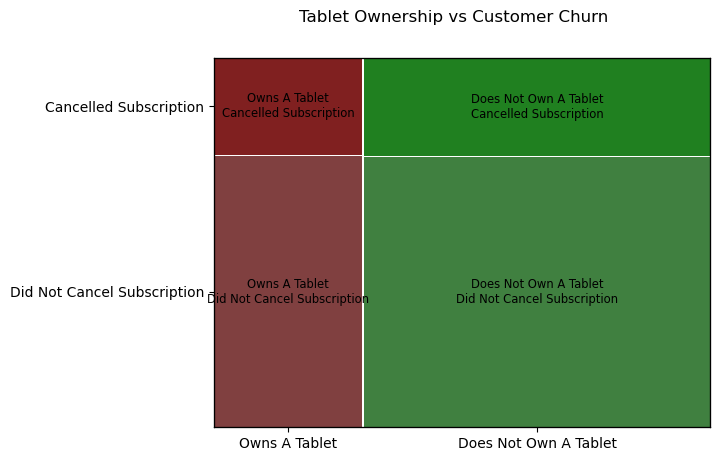

In [50]:
# BOTTOM plot: Bivariate exploration of Tablet vs Churn

temp_df = logistic_regression_df[['Tablet', 'Churn']].copy()
tablet_map = {1: 'Owns A Tablet', 0: 'Does Not Own A Tablet'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['Tablet'] = temp_df['Tablet'].map(tablet_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['Tablet', 'Churn'])
plt.suptitle('Tablet Ownership vs Customer Churn');

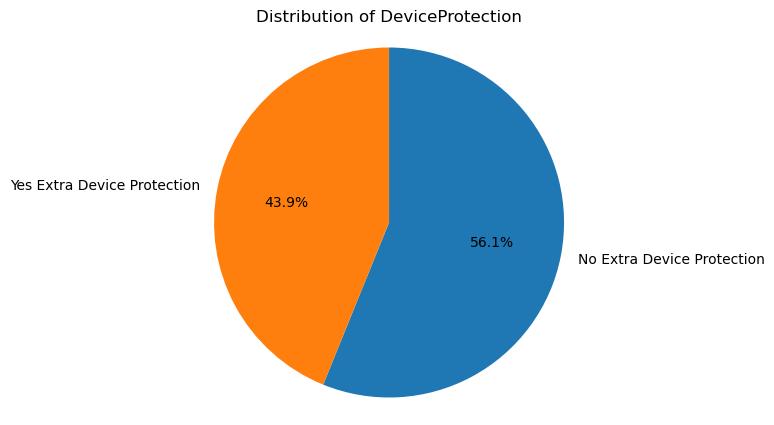

In [51]:
#TOP plot: Univariate exploration of independent variable 'DeviceProtection'

plt.figure(figsize = [16,5])
plt.title('Distribution of DeviceProtection')
deviceprotection_counts = logistic_regression_df.DeviceProtection.value_counts()
deviceprotection_labels = ['No Extra Device Protection', 'Yes Extra Device Protection']
plt.pie(deviceprotection_counts, labels=deviceprotection_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

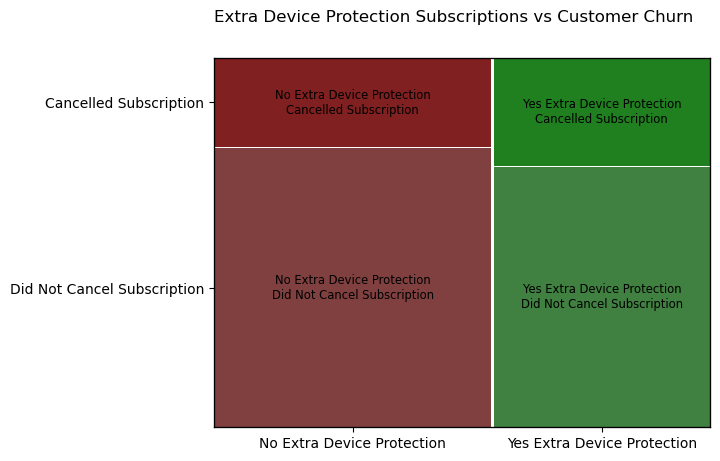

In [52]:
# BOTTOM plot: Bivariate exploration of DeviceProtection vs Churn

temp_df = logistic_regression_df[['DeviceProtection', 'Churn']].copy()
deviceprotection_map = {1: 'Yes Extra Device Protection', 0: 'No Extra Device Protection'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['DeviceProtection'] = temp_df['DeviceProtection'].map(deviceprotection_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['DeviceProtection', 'Churn'])
plt.suptitle('Extra Device Protection Subscriptions vs Customer Churn');

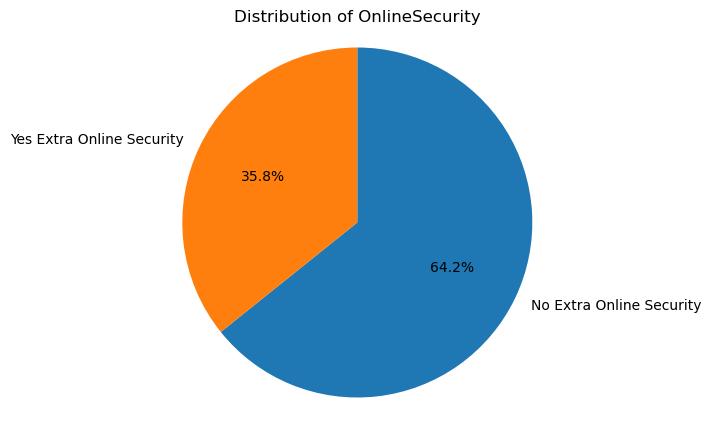

In [53]:
#TOP plot: Univariate exploration of independent variable 'OnlineSecurity'

plt.figure(figsize = [16,5])
plt.title('Distribution of OnlineSecurity')
onlinesecurity_counts = logistic_regression_df.OnlineSecurity.value_counts()
onlinesecurity_labels = ['No Extra Online Security', 'Yes Extra Online Security']
plt.pie(onlinesecurity_counts, labels=onlinesecurity_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

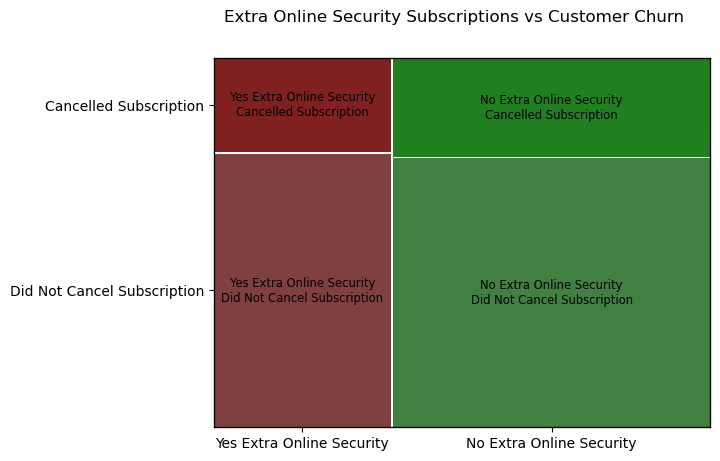

In [54]:
# BOTTOM plot: Bivariate exploration of OnlineSecurity vs Churn

temp_df = logistic_regression_df[['OnlineSecurity', 'Churn']].copy()
onlinesecurity_map = {1: 'Yes Extra Online Security', 0: 'No Extra Online Security'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['OnlineSecurity'] = temp_df['OnlineSecurity'].map(onlinesecurity_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['OnlineSecurity', 'Churn'])
plt.suptitle('Extra Online Security Subscriptions vs Customer Churn');

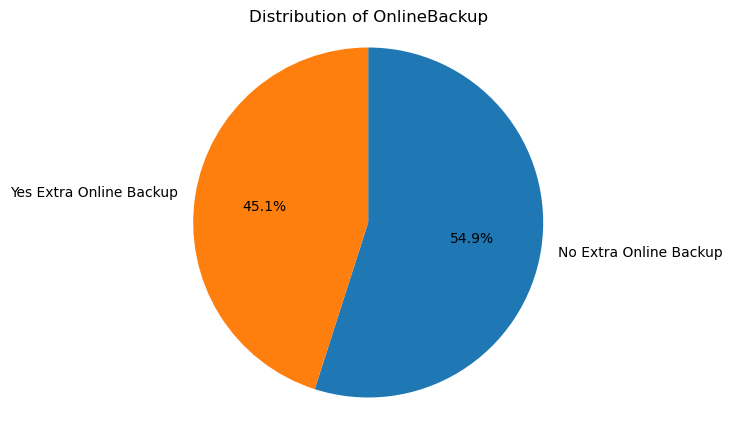

In [55]:
#TOP plot: Univariate exploration of independent variable 'OnlineBackup'

plt.figure(figsize = [16,5])
plt.title('Distribution of OnlineBackup')
onlinebackup_counts = logistic_regression_df.OnlineBackup.value_counts()
onlinebackup_labels = ['No Extra Online Backup', 'Yes Extra Online Backup']
plt.pie(onlinebackup_counts, labels=onlinebackup_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

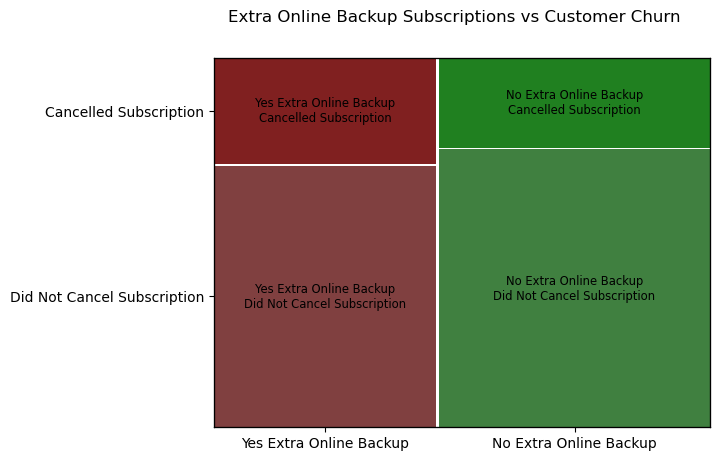

In [56]:
# BOTTOM plot: Bivariate exploration of OnlineBackup vs Churn

temp_df = logistic_regression_df[['OnlineBackup', 'Churn']].copy()
onlinebackup_map = {1: 'Yes Extra Online Backup', 0: 'No Extra Online Backup'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['OnlineBackup'] = temp_df['OnlineBackup'].map(onlinebackup_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['OnlineBackup', 'Churn'])
plt.suptitle('Extra Online Backup Subscriptions vs Customer Churn');

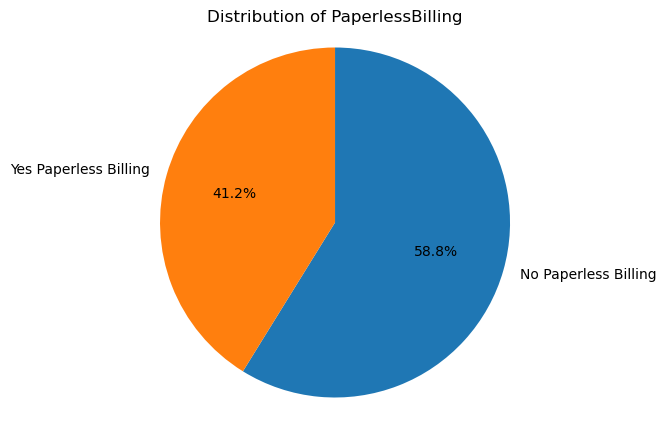

In [57]:
#TOP plot: Univariate exploration of independent variable 'PaperlessBilling'

plt.figure(figsize = [16,5])
plt.title('Distribution of PaperlessBilling')
paperlessbilling_counts = logistic_regression_df.PaperlessBilling.value_counts()
paperlessbilling_labels = ['No Paperless Billing', 'Yes Paperless Billing']
plt.pie(paperlessbilling_counts, labels=paperlessbilling_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square');

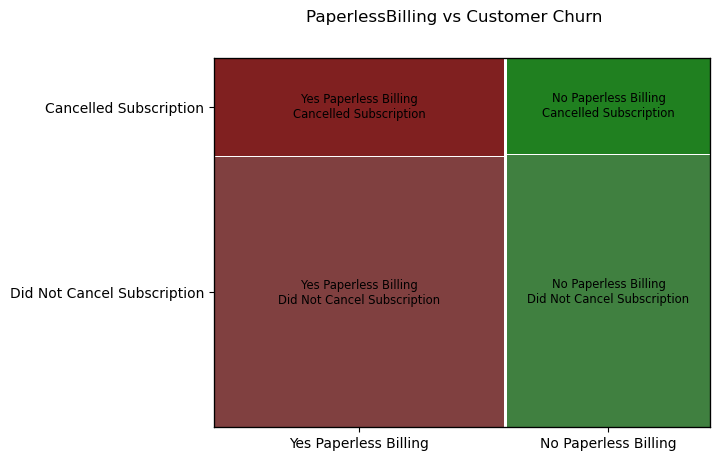

In [58]:
# BOTTOM plot: Bivariate exploration of PaperlessBilling vs Churn

temp_df = logistic_regression_df[['PaperlessBilling', 'Churn']].copy()
paperlessbilling_map = {1: 'Yes Paperless Billing', 0: 'No Paperless Billing'}
churn_map = {1: 'Cancelled Subscription', 0: 'Did Not Cancel Subscription'}
temp_df['PaperlessBilling'] = temp_df['PaperlessBilling'].map(paperlessbilling_map)
temp_df['Churn'] = temp_df['Churn'].map(churn_map)
mosaic(temp_df, ['PaperlessBilling', 'Churn'])
plt.suptitle('PaperlessBilling vs Customer Churn');

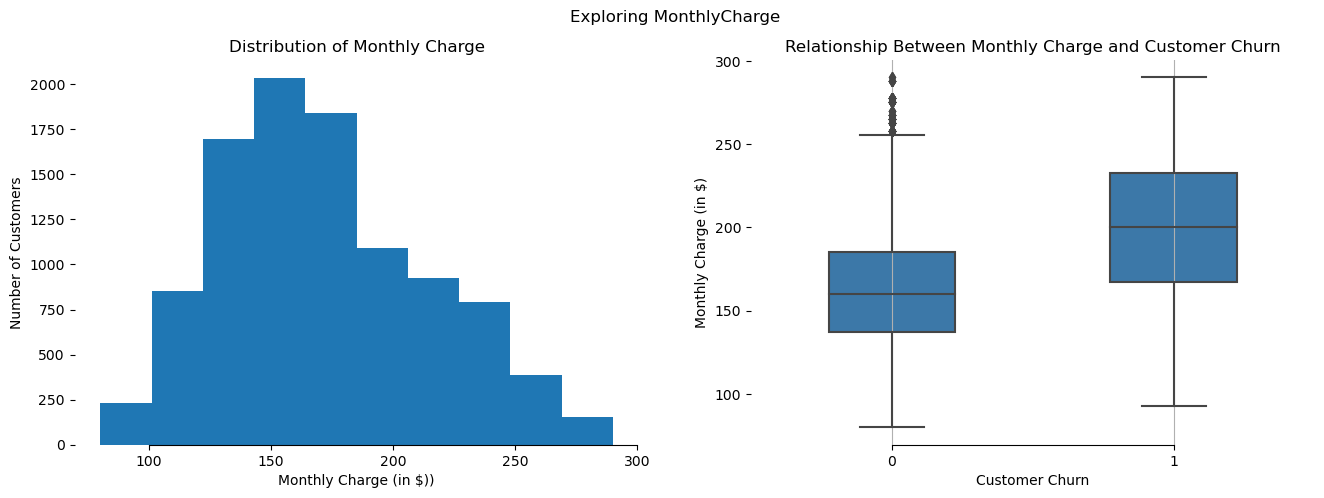

In [59]:
#Plots of Independent Variable 'MonthlyCharge' vs Dependent Variable 'Churn'

plt.figure(figsize = [16,5])
plt.suptitle('Exploring MonthlyCharge')

# LEFT plot: Univariate exploration of MonthlyCharge
plt.subplot(1, 2, 1)
plt.title('Distribution of Monthly Charge')
plt.hist(data=logistic_regression_df, x='MonthlyCharge')
plt.xlabel('Monthly Charge (in $))')
plt.ylabel('Number of Customers');



# RIGHT plot: Bivariate exploration of MonthlyCharge vs Churn  
plt.subplot(1, 2, 2)
g = sns.boxplot(x=logistic_regression_df.Churn, y=logistic_regression_df.MonthlyCharge, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel= 'Customer Churn', ylabel= 'Monthly Charge (in $)', title='Relationship Between Monthly Charge and Customer Churn')
sns.despine(trim=True, left=True);

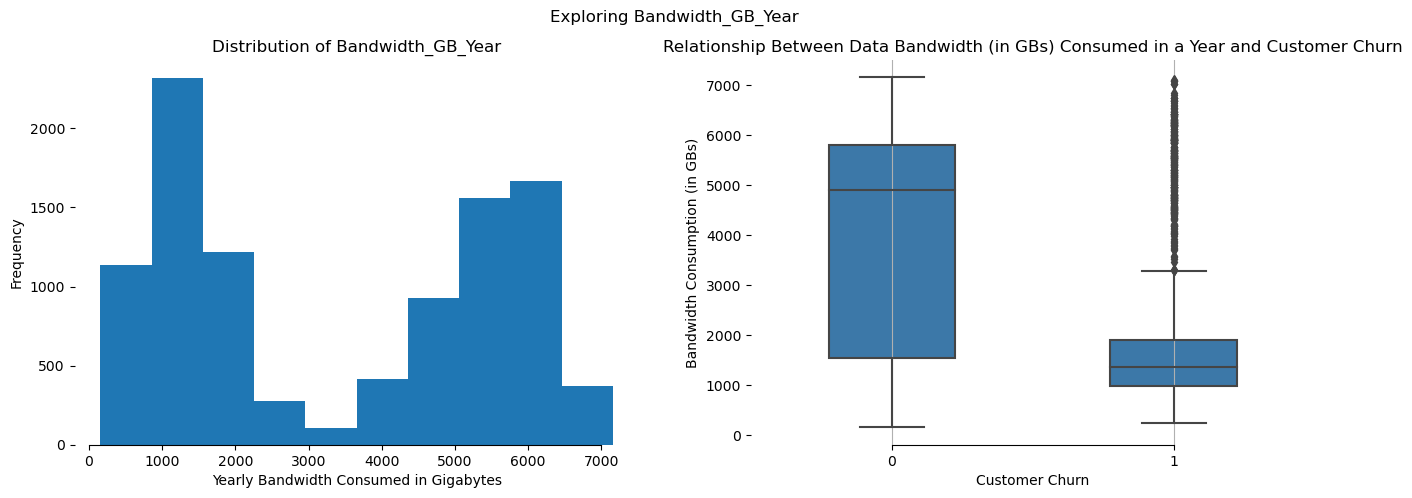

In [60]:
#Plots of Independent Variable 'Bandwidth_GB_Year' vs Dependent Variable 'Churn'

color = sns.color_palette('Blues')[4]

plt.figure(figsize = [16,5])
plt.suptitle('Exploring Bandwidth_GB_Year')

# LEFT plot: Univariate exploration of Bandwidth_GB_Year
plt.subplot(1, 2, 1)
plt.title('Distribution of Bandwidth_GB_Year')
plt.hist(data=logistic_regression_df, x='Bandwidth_GB_Year')
plt.xlabel('Yearly Bandwidth Consumed in Gigabytes')
plt.ylabel('Frequency');



# RIGHT plot: Bivariate exploration of Bandwidth_GB_Year vs Churn  
plt.subplot(1, 2, 2)
g = sns.boxplot(x=logistic_regression_df.Churn, y=logistic_regression_df.Bandwidth_GB_Year, 
                color=color, width=.45)
g.xaxis.grid(True)
g.set(xlabel= 'Customer Churn', ylabel= 'Bandwidth Consumption (in GBs)', title='Relationship Between Data Bandwidth (in GBs) Consumed in a Year and Customer Churn')
sns.despine(trim=True, left=True);

### C4: DATA TRANSFORMATION (Part 2)
* The following lines of code is a continuation of the data transformation that I have taken to prepare the dataset. 

In [61]:
#Checking correlations between variables

logistic_regression_df.corr().abs().sort_values(by='Churn', ascending=False)

,Churn,Techie,TechSupport,StreamingTV,StreamingMovies,Phone,Multiple,Tablet,DeviceProtection,OnlineSecurity,OnlineBackup,PaperlessBilling,MonthlyCharge,Bandwidth_GB_Year
Churn,1.000000,0.066722,0.018838,0.230151,0.289262,0.026297,0.131771,0.002779,0.056489,0.013540,0.050508,0.007030,0.372938,0.441669
Bandwidth_GB_Year,0.441669,0.009455,0.000120,0.054314,0.045600,0.001332,0.006823,0.002129,0.007856,0.021006,0.041740,0.002470,0.060406,1.000000
MonthlyCharge,0.372938,0.007185,0.120301,0.482312,0.608115,0.018977,0.385979,0.007280,0.162735,0.047734,0.259440,0.001348,1.000000,0.060406
StreamingMovies,0.289262,0.004298,0.013533,0.010516,1.000000,0.002588,0.004691,0.020710,0.019450,0.010575,0.001434,0.000692,0.608115,0.045600
StreamingTV,0.230151,0.003436,0.003047,1.000000,0.010516,0.012464,0.003097,0.018233,0.002878,0.001415,0.008043,0.016353,0.482312,0.054314
Multiple,0.131771,0.004661,0.010360,0.003097,0.004691,0.003398,1.000000,0.019828,0.003207,0.002436,0.002566,0.004657,0.385979,0.006823
Techie,0.066722,1.000000,0.007391,0.003436,0.004298,0.003081,0.004661,0.010992,0.021346,0.015300,0.004540,0.001311,0.007185,0.009455
DeviceProtection,0.056489,0.021346,0.004475,0.002878,0.019450,0.030339,0.003207,0.005657,1.000000,0.012852,0.009991,0.013166,0.162735,0.007856
OnlineBackup,0.050508,0.004540,0.002802,0.008043,0.001434,0.003172,0.002566,0.003400,0.009991,0.010338,1.000000,0.010034,0.259440,0.041740
Phone,0.026297,0.003081,0.005060,0.012464,0.002588,1.000000,0.003398,0.024825,0.030339,0.001177,0.003172,0.009228,0.018977,0.001332


In [62]:
# Checking for multicolinearity

df = logistic_regression_df

vif_df = pd.DataFrame()
vif_df['feature'] = df.columns

vif_df['VIF'] = [variance_inflation_factor(df.values, i) 
                  for i in range(len(df.columns))]
print(vif_df)

              feature        VIF
0               Churn   2.208459
1              Techie   1.208394
2         TechSupport   1.766492
3         StreamingTV   3.934595
4     StreamingMovies   4.764221
5               Phone   8.608851
6            Multiple   2.996604
7              Tablet   1.421022
8    DeviceProtection   2.005483
9      OnlineSecurity   1.573049
10       OnlineBackup   2.391125
11   PaperlessBilling   2.375758
12      MonthlyCharge  49.458985
13  Bandwidth_GB_Year   4.455248


In [63]:
#Dropping 'MonthlyCharge' due to high multicolinearity (VIF > 10)

logistic_regression_df.drop(['MonthlyCharge'], axis = 1, inplace = True)

In [64]:
# re-checking for multicolinearity
df = logistic_regression_df

vif_df = pd.DataFrame()
vif_df['feature'] = df.columns

vif_df['VIF'] = [variance_inflation_factor(df.values, i) 
                  for i in range(len(df.columns))]
print(vif_df)

              feature       VIF
0               Churn  2.167614
1              Techie  1.201677
2         TechSupport  1.554782
3         StreamingTV  2.146071
4     StreamingMovies  2.241174
5               Phone  5.583923
6            Multiple  1.852736
7              Tablet  1.410280
8    DeviceProtection  1.723242
9      OnlineSecurity  1.523936
10       OnlineBackup  1.787485
11   PaperlessBilling  2.262359
12  Bandwidth_GB_Year  4.126276


In [65]:
#No other variables will be eliminated at this point since VIF on all of the remaining variables is below 10

In [66]:
#Checking the transformed data prior to final exportation to working .csv file

df.head()

,Churn,Techie,TechSupport,StreamingTV,StreamingMovies,Phone,Multiple,Tablet,DeviceProtection,OnlineSecurity,OnlineBackup,PaperlessBilling,Bandwidth_GB_Year
CaseOrder,,,,,,,,,,,,,
1,0,0,0,0,1,1,0,1,0,1,1,1,904.536110
2,1,1,0,1,1,1,1,1,0,1,0,1,800.982766
3,0,1,0,0,1,1,1,0,0,0,0,1,2054.706961
4,0,1,0,1,0,1,0,0,0,1,0,1,2164.579412
5,1,0,1,1,0,0,0,0,0,0,0,0,271.493436


### C5: PREPARED DATA SET
* The cell below contains the code run to create the prepared dataset for logistic regression. It contains only 13 variables since 'MonthlyCharge' was dropped due to exhibiting high multicolinearity 

In [67]:
# Save dataframe to CSV and ignore index 

logistic_regression_df.to_csv (r'C:\Users\neoka\OneDrive\Desktop\WGU MSDA Course Material\D208\D208 PA Submission Task 2\churn_clean_logistic_regression_revision.csv', index = False)

### D1: INITIAL MODEL
* The initial model was constructed with 'Churn' as the response variable and the following 12 variables as the independent/predictor variables: 'Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'Bandwidth_GB_Year'.


In [68]:
model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'Bandwidth_GB_Year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326603
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4352
Time:                        14:22:17   Log-Likelihood:                -3266.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6845      0.081      8.422      0.000       0.525       0.844
TechSupport           0.2263      0.064      3.523      0.000       0.100       0.352
StreamingTV           2.1835      0.073     30.094      0.000       2.041       2.326
StreamingMovies       2.5641      0.075     34.395      0.000       2.418       2.710
Phone                -0.2791      0.105     -2.647      0.008      -0.486      -0.072
Multiple              1.1530      0.065     17.772      0.000       1.026       1.280
Tablet               -0.0494      0.068     -0.729      0.466      -0.182       0.083
DeviceProtection      0.3462      0.063      5.527      0.000       0.223       0.469
OnlineSecurity       -0.0608      0.065     -0.934      0.350      -0.189       0.067
OnlineBackup          0.6109      0.063      9.658      0.000       0.487       0.735
PaperlessBilling      0.0599      0.063      0.945      0.345      -0.064       0.184
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.309      0.000      -0.001      -0.001
const                -2.2793      0.143    -15.894      0.000      -2.560      -1.998
=====================================================================================
"""

### D2: JUSTIFICATION OF MODEL REDUCTION
* After running the initial logistic regression model, our summary results show a pseudo r-squared value off 0.4352. We will see if model reduction can increaes this value closer to 1 since the higher values indicate better model fits for the data. Additionally, our LLR p-value of 0.000 indicates that our model is statistically significant, enabling us to reject the null hypothesis. However, despite our initial model already exhibiting statistics showing that it is a good fit for our chosen variables, some features still exhibit p-values above our chosen alpha of 0.05. Therefore, we will employ backwards elimination and remove p-values above our chosen alpha in a one-by-one fashion until no other features are above the alpha threshold. Removing features one-by-one ensures that we do not risk losing variables that could contribute to the model accuracy.


In [69]:
#Backwards elimination for those with p-values > 0.05 ('Tablet' is eliminated). Will eliminate one-by-one 

model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'Bandwidth_GB_Year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326630
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4351
Time:                        14:24:47   Log-Likelihood:                -3266.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6833      0.081      8.411      0.000       0.524       0.842
TechSupport           0.2271      0.064      3.536      0.000       0.101       0.353
StreamingTV           2.1836      0.073     30.094      0.000       2.041       2.326
StreamingMovies       2.5630      0.075     34.394      0.000       2.417       2.709
Phone                -0.2813      0.105     -2.669      0.008      -0.488      -0.075
Multiple              1.1542      0.065     17.797      0.000       1.027       1.281
DeviceProtection      0.3462      0.063      5.527      0.000       0.223       0.469
OnlineSecurity       -0.0608      0.065     -0.934      0.350      -0.189       0.067
OnlineBackup          0.6106      0.063      9.654      0.000       0.487       0.735
PaperlessBilling      0.0590      0.063      0.930      0.352      -0.065       0.183
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.312      0.000      -0.001      -0.001
const                -2.2917      0.142    -16.090      0.000      -2.571      -2.013
=====================================================================================
"""

In [70]:
#Backwards elimination for those with p-values > 0.05 ('PaperlessBilling' is eliminated). Will continue to eliminate one-by-one

model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'Bandwidth_GB_Year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326673
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4350
Time:                        14:25:03   Log-Likelihood:                -3266.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6845      0.081      8.429      0.000       0.525       0.844
TechSupport           0.2263      0.064      3.524      0.000       0.100       0.352
StreamingTV           2.1822      0.073     30.088      0.000       2.040       2.324
StreamingMovies       2.5630      0.075     34.399      0.000       2.417       2.709
Phone                -0.2833      0.105     -2.690      0.007      -0.490      -0.077
Multiple              1.1536      0.065     17.791      0.000       1.027       1.281
DeviceProtection      0.3475      0.063      5.550      0.000       0.225       0.470
OnlineSecurity       -0.0603      0.065     -0.926      0.355      -0.188       0.067
OnlineBackup          0.6114      0.063      9.668      0.000       0.487       0.735
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.312      0.000      -0.001      -0.001
const                -2.2552      0.137    -16.489      0.000      -2.523      -1.987
=====================================================================================
"""

In [71]:
#Backwards elimination for those with p-values > 0.05 ('OnlineSecurity' is eliminated). 


reduced_model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineBackup', 'Bandwidth_GB_Year']

# Defining variables
X = df[reduced_model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
reduced_model_result = logistic_model.fit()

# Get summary of the logistic regression model
reduced_model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326716
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4350
Time:                        14:25:24   Log-Likelihood:                -3267.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6859      0.081      8.447      0.000       0.527       0.845
TechSupport           0.2254      0.064      3.510      0.000       0.100       0.351
StreamingTV           2.1818      0.073     30.087      0.000       2.040       2.324
StreamingMovies       2.5629      0.075     34.397      0.000       2.417       2.709
Phone                -0.2831      0.105     -2.688      0.007      -0.490      -0.077
Multiple              1.1544      0.065     17.804      0.000       1.027       1.282
DeviceProtection      0.3470      0.063      5.543      0.000       0.224       0.470
OnlineBackup          0.6109      0.063      9.662      0.000       0.487       0.735
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.324      0.000      -0.001      -0.001
const                -2.2757      0.135    -16.854      0.000      -2.540      -2.011
=====================================================================================
"""

### D3: REDUCED LOGISTIC REGRESSION MODEL
* Below is the code for our reduced model. No further feature elimination will occur since all p-values are below our chosen threshold of 0.05. Our Pseudo r-squared value remains high at 0.4350 and LLR p-value is still 0.0000. It is very similar to our initial model, however, we can achieve very similar results with our reduced model containing fewer features, therefore we will choose our reduced model as the final iteration. 

In [72]:
#This is the final model since all remaining p-values are below our alpha of 0.05

reduced_model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineBackup', 'Bandwidth_GB_Year']

# Defining variables
X = df[reduced_model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
reduced_model_result = logistic_model.fit()

# Get summary of the logistic regression model
reduced_model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326716
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4350
Time:                        14:25:42   Log-Likelihood:                -3267.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6859      0.081      8.447      0.000       0.527       0.845
TechSupport           0.2254      0.064      3.510      0.000       0.100       0.351
StreamingTV           2.1818      0.073     30.087      0.000       2.040       2.324
StreamingMovies       2.5629      0.075     34.397      0.000       2.417       2.709
Phone                -0.2831      0.105     -2.688      0.007      -0.490      -0.077
Multiple              1.1544      0.065     17.804      0.000       1.027       1.282
DeviceProtection      0.3470      0.063      5.543      0.000       0.224       0.470
OnlineBackup          0.6109      0.063      9.662      0.000       0.487       0.735
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.324      0.000      -0.001      -0.001
const                -2.2757      0.135    -16.854      0.000      -2.540      -2.011
=====================================================================================
"""

### E1: MODEL COMPARISON
* As previously mentioned upon initially reviewing our final model, our Pseudo r-squared value remains high at 0.4350 and LLR p-value is still 0.0000. It is very similar to our initial model, however, we can achieve very similar results with our reduced model containing fewer features, therefore we will choose our reduced model as the final iteration. Also, for purposes of comparison, listed below are the feature coefficients of both the initial and final models. 

In [73]:
#Initial Model

model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'Bandwidth_GB_Year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326603
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4352
Time:                        14:26:00   Log-Likelihood:                -3266.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6845      0.081      8.422      0.000       0.525       0.844
TechSupport           0.2263      0.064      3.523      0.000       0.100       0.352
StreamingTV           2.1835      0.073     30.094      0.000       2.041       2.326
StreamingMovies       2.5641      0.075     34.395      0.000       2.418       2.710
Phone                -0.2791      0.105     -2.647      0.008      -0.486      -0.072
Multiple              1.1530      0.065     17.772      0.000       1.026       1.280
Tablet               -0.0494      0.068     -0.729      0.466      -0.182       0.083
DeviceProtection      0.3462      0.063      5.527      0.000       0.223       0.469
OnlineSecurity       -0.0608      0.065     -0.934      0.350      -0.189       0.067
OnlineBackup          0.6109      0.063      9.658      0.000       0.487       0.735
PaperlessBilling      0.0599      0.063      0.945      0.345      -0.064       0.184
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.309      0.000      -0.001      -0.001
const                -2.2793      0.143    -15.894      0.000      -2.560      -1.998
=====================================================================================
"""

In [74]:
#Final Model 

reduced_model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineBackup', 'Bandwidth_GB_Year']

# Defining variables
X = df[reduced_model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
reduced_model_result = logistic_model.fit()

# Get summary of the logistic regression model
reduced_model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326716
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4350
Time:                        14:26:08   Log-Likelihood:                -3267.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6859      0.081      8.447      0.000       0.527       0.845
TechSupport           0.2254      0.064      3.510      0.000       0.100       0.351
StreamingTV           2.1818      0.073     30.087      0.000       2.040       2.324
StreamingMovies       2.5629      0.075     34.397      0.000       2.417       2.709
Phone                -0.2831      0.105     -2.688      0.007      -0.490      -0.077
Multiple              1.1544      0.065     17.804      0.000       1.027       1.282
DeviceProtection      0.3470      0.063      5.543      0.000       0.224       0.470
OnlineBackup          0.6109      0.063      9.662      0.000       0.487       0.735
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.324      0.000      -0.001      -0.001
const                -2.2757      0.135    -16.854      0.000      -2.540      -2.011
=====================================================================================
"""

In [75]:
#Initial Model Coefficients

model_result.params

Techie               0.684525
TechSupport          0.226331
StreamingTV          2.183528
StreamingMovies      2.564149
Phone               -0.279078
Multiple             1.152984
Tablet              -0.049415
DeviceProtection     0.346153
OnlineSecurity      -0.060835
OnlineBackup         0.610910
PaperlessBilling     0.059941
Bandwidth_GB_Year   -0.000889
const               -2.279280
dtype: float64

In [76]:
#Final Model Coefficients

reduced_model_result.params  

Techie               0.685877
TechSupport          0.225399
StreamingTV          2.181780
StreamingMovies      2.562893
Phone               -0.283103
Multiple             1.154421
DeviceProtection     0.346972
OnlineBackup         0.610936
Bandwidth_GB_Year   -0.000889
const               -2.275691
dtype: float64

### E2: OUTPUT AND CALCULATIONS
* Listed below is all of the code used for both the initial and final models.

In [77]:
model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'Tablet', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'Bandwidth_GB_Year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326603
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4352
Time:                        14:26:55   Log-Likelihood:                -3266.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6845      0.081      8.422      0.000       0.525       0.844
TechSupport           0.2263      0.064      3.523      0.000       0.100       0.352
StreamingTV           2.1835      0.073     30.094      0.000       2.041       2.326
StreamingMovies       2.5641      0.075     34.395      0.000       2.418       2.710
Phone                -0.2791      0.105     -2.647      0.008      -0.486      -0.072
Multiple              1.1530      0.065     17.772      0.000       1.026       1.280
Tablet               -0.0494      0.068     -0.729      0.466      -0.182       0.083
DeviceProtection      0.3462      0.063      5.527      0.000       0.223       0.469
OnlineSecurity       -0.0608      0.065     -0.934      0.350      -0.189       0.067
OnlineBackup          0.6109      0.063      9.658      0.000       0.487       0.735
PaperlessBilling      0.0599      0.063      0.945      0.345      -0.064       0.184
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.309      0.000      -0.001      -0.001
const                -2.2793      0.143    -15.894      0.000      -2.560      -1.998
=====================================================================================
"""

In [78]:
#Backwards elimination for those with p-values > 0.05 ('Tablet' is eliminated). Will eliminate one-by-one 

model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'PaperlessBilling', 'Bandwidth_GB_Year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326630
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4351
Time:                        14:27:01   Log-Likelihood:                -3266.3
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6833      0.081      8.411      0.000       0.524       0.842
TechSupport           0.2271      0.064      3.536      0.000       0.101       0.353
StreamingTV           2.1836      0.073     30.094      0.000       2.041       2.326
StreamingMovies       2.5630      0.075     34.394      0.000       2.417       2.709
Phone                -0.2813      0.105     -2.669      0.008      -0.488      -0.075
Multiple              1.1542      0.065     17.797      0.000       1.027       1.281
DeviceProtection      0.3462      0.063      5.527      0.000       0.223       0.469
OnlineSecurity       -0.0608      0.065     -0.934      0.350      -0.189       0.067
OnlineBackup          0.6106      0.063      9.654      0.000       0.487       0.735
PaperlessBilling      0.0590      0.063      0.930      0.352      -0.065       0.183
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.312      0.000      -0.001      -0.001
const                -2.2917      0.142    -16.090      0.000      -2.571      -2.013
=====================================================================================
"""

In [79]:
#Backwards elimination for those with p-values > 0.05 ('PaperlessBilling' is eliminated). Will continue to eliminate one-by-one

model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineSecurity', 'OnlineBackup', 'Bandwidth_GB_Year']

# Defining variables
X = df[model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
model_result = logistic_model.fit()

# Get summary of the logistic regression model
model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326673
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4350
Time:                        14:27:03   Log-Likelihood:                -3266.7
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6845      0.081      8.429      0.000       0.525       0.844
TechSupport           0.2263      0.064      3.524      0.000       0.100       0.352
StreamingTV           2.1822      0.073     30.088      0.000       2.040       2.324
StreamingMovies       2.5630      0.075     34.399      0.000       2.417       2.709
Phone                -0.2833      0.105     -2.690      0.007      -0.490      -0.077
Multiple              1.1536      0.065     17.791      0.000       1.027       1.281
DeviceProtection      0.3475      0.063      5.550      0.000       0.225       0.470
OnlineSecurity       -0.0603      0.065     -0.926      0.355      -0.188       0.067
OnlineBackup          0.6114      0.063      9.668      0.000       0.487       0.735
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.312      0.000      -0.001      -0.001
const                -2.2552      0.137    -16.489      0.000      -2.523      -1.987
=====================================================================================
"""

In [80]:
#Backwards elimination for those with p-values > 0.05 ('OnlineSecurity' is eliminated). 


reduced_model_var = ['Techie', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Phone', 'Multiple', 'DeviceProtection', 'OnlineBackup', 'Bandwidth_GB_Year']

# Defining variables
X = df[reduced_model_var].assign(const=1)
y = df['Churn']

logistic_model = sm.Logit(y, X)
reduced_model_result = logistic_model.fit()

# Get summary of the logistic regression model
reduced_model_result.summary()

Optimization terminated successfully.
         Current function value: 0.326716
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Wed, 11 Dec 2024   Pseudo R-squ.:                  0.4350
Time:                        14:27:06   Log-Likelihood:                -3267.2
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Techie                0.6859      0.081      8.447      0.000       0.527       0.845
TechSupport           0.2254      0.064      3.510      0.000       0.100       0.351
StreamingTV           2.1818      0.073     30.087      0.000       2.040       2.324
StreamingMovies       2.5629      0.075     34.397      0.000       2.417       2.709
Phone                -0.2831      0.105     -2.688      0.007      -0.490      -0.077
Multiple              1.1544      0.065     17.804      0.000       1.027       1.282
DeviceProtection      0.3470      0.063      5.543      0.000       0.224       0.470
OnlineBackup          0.6109      0.063      9.662      0.000       0.487       0.735
Bandwidth_GB_Year    -0.0009    2.1e-05    -42.324      0.000      -0.001      -0.001
const                -2.2757      0.135    -16.854      0.000      -2.540      -2.011
=====================================================================================
"""

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f' Model Accuracy: {accuracy}')
print('Confusion Matrix: \n', conf_matrix)
print('Classification Report:\n', classification_rep)

 Model Accuracy: 0.8426666666666667
Confusion Matrix: 
 [[1993  163]
 [ 309  535]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      2156
           1       0.77      0.63      0.69       844

    accuracy                           0.84      3000
   macro avg       0.82      0.78      0.79      3000
weighted avg       0.84      0.84      0.84      3000



### E2: OUTPUT AND CALCULATIONS CONTINUED
* The confusion matrix shows that our model has 1993 true negatives and 163 true positives or correct predictions. The matrix also shows 309 false negatives and 535 false positives. In conclusion, the model is accurate around 84.3% of the time (GeeksforGeeks, Logistic regression using python 2023).

### E3: CODE
*A copy of the code will be attached in a Jupyter Notebook file.

### F1: RESULTS
The following is the regression equation for the reduced model:

* log (odds of churn) = -2.2757 (constant) - 0.0009 (Bandwidth_GB_Year) + 0.6109 (OnlineBackup) + 0.3470 (DeviceProtection) + 1.1544 (Multiple) - 0.2831 (Phone) + 2.563 (StreamingMovies) + 2.182 (StreamingTV) + 0.2254 (TechSupport) + 0.6859 (Techie)

Based on this equation, if all other variables are zero, the constant would be the value of Churn, which interestingly enough is a decrease by 2.2757 units. Also equally interesting is the fact that per the equation, Multiple, StreamingTV, and StreamingMovies all have a strong influence on Churn. Each unit in the positive direction of those features contributes to a higher Churn value of magnitudes of 1.1544, 2.563, and 2.182, respectively. Techie, TechSupport, DeviceProtection, and OnlineBackup also contribute to increased churn in a similar manner but at a much smaller magnitude since they all have coefficients less than 1. Conversely, Phone and Bandwidth_GB_Year lead to a decrease of Churn per unit increase, albeit at very small magnitudes due to their very small coefficients of -0.2831 and -0.0009, respectively.

Statistically speaking, the model has significance predicting Churn due to having an LLR p-value of 0.000. 

A limitation of logistic regression is that there is a risk of the inclusion of irrelevant variables, which can lead to overfitting and decreased model interpretability. Thorough feature selection through the use of techniques such as L1 or L2 regularization can help mitigate the effects of irrelevant features on the model's efficiency (Kumar, 4. assumptions and limitations of logistic regression: Navigating the nuances 2023).


In [82]:
print(f"The odds ratio for Techie is {round(np.exp(0.685877), 4)}. Given this, the change in odds for Churn is {round((np.exp(0.685877) - 1) * 100, 4)}")

print(f"The odds ratio for TechSupport is {round(np.exp(0.225399), 4)}. Given this, the change in odds for Churn is {round((np.exp(0.225399) - 1) * 100, 4)}")

print(f"The odds ratio for StreamingTV is {round(np.exp(2.181780), 4)}. Given this, the change in odds for Churn is {round((np.exp(2.181780) - 1) * 100, 4)}")

print(f"The odds ratio for StreamingMovies is {round(np.exp(2.562893), 4)}. Given this, the change in odds for Churn is {round((np.exp(2.562893) - 1) * 100, 4)}")

print(f"The odds ratio for Phone is {round(np.exp(0.283103), 4)}. Given this, the change in odds for Churn is {round((np.exp(0.283103) - 1) * 100, 4)}")

print(f"The odds ratio for Multiple is {round(np.exp(1.154421), 4)}. Given this, the change in odds for Churn is {round((np.exp(1.154421) - 1) * 100, 4)}")

print(f"The odds ratio for DeviceProtection is {round(np.exp(0.346972), 4)}. Given this, the change in odds for Churn is {round((np.exp(0.346972) - 1) * 100, 4)}")

print(f"The odds ratio for OnlineBackup is {round(np.exp(0.610936), 4)}. Given this, the change in odds for Churn is {round((np.exp(0.610936) - 1) * 100, 4)}")

print(f"The odds ratio for Bandwidth_GB_Year is {round(np.exp(0.000889), 4)}. Given this, the change in odds for Churn is {round((np.exp(0.000889) - 1) * 100, 4)}")

print(f"The odds ratio for const is {round(np.exp(2.275691), 4)}. Given this, the change in odds for Churn is {round((np.exp(2.275691) - 1) * 100, 4)}")

The odds ratio for Techie is 1.9855. Given this, the change in odds for Churn is 98.5512
The odds ratio for TechSupport is 1.2528. Given this, the change in odds for Churn is 25.2822
The odds ratio for StreamingTV is 8.8621. Given this, the change in odds for Churn is 786.2067
The odds ratio for StreamingMovies is 12.9733. Given this, the change in odds for Churn is 1197.3295
The odds ratio for Phone is 1.3272. Given this, the change in odds for Churn is 32.7242
The odds ratio for Multiple is 3.1722. Given this, the change in odds for Churn is 217.2186
The odds ratio for DeviceProtection is 1.4148. Given this, the change in odds for Churn is 41.4777
The odds ratio for OnlineBackup is 1.8422. Given this, the change in odds for Churn is 84.2155
The odds ratio for Bandwidth_GB_Year is 1.0009. Given this, the change in odds for Churn is 0.0889
The odds ratio for const is 9.7346. Given this, the change in odds for Churn is 873.4643


### F2: RECOMMENDATIONS
* My recommendation based on the results of this analysis would be to ask for data regarding individual prices per additional service, especially on services such as Multiple, StreamingTV, and StreamingMovies. According to the equation, an increase in any of those significantly increases Churn. One might be able to infer that addition of services is still outweighed by the increase in customer bill and could cause them to feel that they are being overcharged. 

### G: PANOPTO DEMONSTRATION
* My Panopto Submission can be found at the following link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ede8b59e-e298-440e-bafe-b243016e5726

### H:SOURCES OF THIRD-PARTY CODE

GeeksforGeeks. (2023, December 4). Logistic regression using python.
    https://www.geeksforgeeks.org/ml-logistic-regression-using-python/ 

GeeksforGeeks. (2024, July 29). How to make a mosaic plot in Matplotlib. 
    https://www.geeksforgeeks.org/how-to-make-a-mosaic-plot-in-matplotlib/ 

### I: SOURCES

Bobbitt, Z. (2020, October 13). The 6 assumptions of logistic regression (with examples). Statology. https://www.statology.org/assumptions-of-logistic-regression/ 

GeeksforGeeks. (2023, December 4). Logistic regression using python. https://www.geeksforgeeks.org/ml-logistic-regression-using-python/ 

GeeksforGeeks. (2024, July 29). How to make a mosaic plot in Matplotlib. https://www.geeksforgeeks.org/how-to-make-a-mosaic-plot-in-matplotlib/ 

Kumar, S. (2023, November 14). 4. assumptions and limitations of logistic regression: Navigating the nuances. Medium. https://medium.com/@skme20417/4-assumptions-and-limitations-of-logistic-regression-navigating-the-nuances-8ef249cc7a01 